# **1. Perkenalan Dataset**


# Proyek Clustering untuk Deteksi Pola pada Data Tanpa Label

## **Tujuan Proyek**
Proyek ini bertujuan untuk melakukan analisis clustering pada dataset tanpa label. Clustering adalah teknik unsupervised learning yang digunakan untuk mengelompokkan data berdasarkan kesamaan fitur. Dalam konteks ini, proyek dapat digunakan untuk berbagai tujuan, seperti **deteksi penipuan (fraud detection)**, **segmentasi pelanggan**, atau analisis pola tersembunyi lainnya.

## **Kriteria Dataset**
Dataset yang akan digunakan harus memenuhi ketentuan berikut:
1. **Sumber Dataset**:
   - Dataset dapat diperoleh dari berbagai sumber, seperti:
     - Public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*).
     - Data primer yang dikumpulkan secara mandiri.

2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki kolom target atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**:
     - *Kategorikal*: Contoh: jenis kelamin, kategori produk.
     - *Numerikal*: Contoh: usia, pendapatan, harga.

3. **Pembatasan**:
   - Dataset yang sudah digunakan dalam latihan clustering sebelumnya (misalnya, customer segmentation) tidak boleh digunakan.

## **Langkah-Langkah Proyek**
1. **Pemilihan Dataset**:
   - Memilih dataset yang sesuai dengan kriteria di atas.
   
2. **Preprocessing Data**:
   - Melakukan encoding pada data kategorikal.
   - Normalisasi atau standarisasi data numerikal.

3. **Implementasi Clustering**:
   - Menggunakan algoritma clustering seperti:
     - K-Means
     - DBSCAN
     - Hierarchical Clustering

4. **Analisis Hasil**:
   - Mengevaluasi hasil clustering untuk menemukan pola atau insight yang relevan.
   - Menginterpretasikan kelompok-kelompok yang terbentuk.

## **Hasil yang Diharapkan**
- Mengidentifikasi pola atau struktur tersembunyi dalam data.
- Menghasilkan kelompok-kelompok data yang dapat digunakan untuk analisis lebih lanjut, seperti deteksi penipuan atau segmentasi pelanggan.

# **2. Import Library**

## **Tahap 1: Mengimpor Pustaka yang Dibutuhkan**

Pada tahap ini, kita akan mengimpor pustaka (library) Python yang diperlukan untuk analisis data dan pembangunan model machine learning. Pustaka-pustaka ini akan membantu dalam proses seperti manipulasi data, visualisasi, preprocessing, dan implementasi algoritma clustering.

### **Pustaka yang Digunakan**
1. **Pandas**: Untuk manipulasi dan analisis data dalam bentuk tabel.
2. **NumPy**: Untuk operasi numerik dan array multidimensi.
3. **Matplotlib** dan **Seaborn**: Untuk visualisasi data.
4. **Scikit-learn**: Untuk preprocessing data dan implementasi algoritma clustering.

In [23]:
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Untuk visualisasi metode Elbow
import seaborn as sns  # Untuk membuat plot statistik yang lebih kompleks
import numpy as np  # Untuk komputasi numerik yang kompleks

# Pustaka untuk preprocessing
from sklearn.preprocessing import StandardScaler  # Untuk standarisasi data
from sklearn.preprocessing import LabelEncoder  # Untuk encoding data kategorikal

# Pustaka untuk algoritma clustering
from sklearn.cluster import KMeans, DBSCAN  # Untuk algoritma KMeans dan DBSCAN

# Pustaka untuk evaluasi dan seleksi fitur
from sklearn.metrics import silhouette_score  # Untuk mengevaluasi hasil clustering
from sklearn.feature_selection import RFE  # Untuk seleksi fitur menggunakan Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression  # Untuk seleksi fitur berbasis Logistic Regression

# Pustaka untuk visualisasi hasil clustering
from sklearn.decomposition import PCA  # Untuk visualisasi hasil clustering menggunakan PCA

# **3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset ke dalam notebook untuk dianalisis lebih lanjut. Jika dataset dalam format CSV, kita dapat menggunakan pustaka **pandas** untuk membacanya. Langkah ini penting untuk memastikan data telah dimuat dengan benar dan memahami struktur dataset.

### **Langkah-Langkah Memuat Dataset**
1. **Dataset dalam Format CSV**:
   - Gunakan fungsi `pd.read_csv()` dari pustaka pandas untuk membaca file CSV.
   - Pastikan file dataset berada di direktori yang benar atau tambahkan path lengkap ke file.

2. **Dataset di Google Drive**:
   - Jika Anda menggunakan Google Colab dan dataset berada di Google Drive, hubungkan Google Drive ke Colab terlebih dahulu dengan kode berikut:
     ```python
     from google.colab import drive
     drive.mount('/content/drive')
     ```
   - Setelah itu, gunakan path file yang sesuai untuk membaca dataset.

3. **Memeriksa Dataset**:
   - Gunakan fungsi seperti `head()` untuk melihat beberapa baris awal dataset.
   - Periksa informasi dataset menggunakan `info()` untuk memastikan data telah dimuat dengan benar.

In [24]:
# Membaca dataset dari data awal dan menampilkan 5 baris pertama data.
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## **Tahap 4: Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

### **1. Memahami Struktur Data**
- Tinjau jumlah baris dan kolom dalam dataset menggunakan fungsi seperti `shape`.
- Tinjau jenis data di setiap kolom (numerikal atau kategorikal) menggunakan `info()` atau `dtypes`.

### **2. Menangani Data yang Hilang**
- Identifikasi data yang hilang (*missing values*) menggunakan fungsi seperti `isnull().sum()`.
- Tentukan langkah-langkah untuk menangani data yang hilang, seperti:
  - Mengisi nilai yang hilang dengan rata-rata, median, atau modus.
  - Menghapus baris atau kolom dengan data yang hilang jika proporsinya signifikan.

### **3. Analisis Distribusi dan Korelasi**
- Analisis distribusi variabel numerik:
  - Gunakan statistik deskriptif seperti `describe()`.
  - Visualisasikan distribusi dengan histogram atau boxplot.
- Periksa hubungan antar variabel:
  - Gunakan matriks korelasi dengan `corr()` dan visualisasikan dengan heatmap.
  - Gunakan scatter plot untuk menganalisis hubungan antar variabel numerik.

### **4. Visualisasi Data**
- Buat visualisasi dasar untuk memahami data:
  - Gunakan diagram batang untuk variabel kategorikal.
  - Gunakan histogram atau boxplot untuk variabel numerik.
- Gunakan visualisasi lanjutan:
  - Heatmap untuk menganalisis korelasi antar variabel.
  - Pairplot untuk melihat hubungan antar variabel numerik.

### **Tujuan EDA**
Tujuan dari EDA adalah untuk:
- Memperoleh wawasan awal yang mendalam mengenai data.
- Mengidentifikasi pola, anomali, atau masalah dalam data.
- Menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [25]:
# Menampilkan informasi tentang dataset, termasuk jumlah total entri, kolom, tipe data, dan total nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [26]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam dataset
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002512,AC00460,NaN,2023-02-14 16:21:23,Debit,Fort Worth,D000663,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


## **Mengelompokkan Usia Pelanggan dan Visualisasi Distribusi**

Pada tahap ini, kita mengelompokkan usia pelanggan ke dalam beberapa rentang menggunakan teknik **binning**. Setelah itu, kita membuat grafik batang untuk memvisualisasikan distribusi jumlah pelanggan berdasarkan kelompok usia.

### **Langkah-Langkah**
1. **Mengelompokkan Usia**:
   - Usia pelanggan dikelompokkan ke dalam beberapa rentang:
     - 18-25 tahun
     - 26-35 tahun
     - 36-45 tahun
     - 46-55 tahun
     - 55+ tahun
   - Pengelompokan dilakukan dengan memfilter data berdasarkan kondisi tertentu.

2. **Menyiapkan Data untuk Plotting**:
   - Nama kelompok usia disimpan dalam variabel `x`.
   - Jumlah pelanggan di setiap kelompok dihitung dan disimpan dalam variabel `y`.

3. **Membuat Grafik Batang**:
   - Grafik batang dibuat menggunakan pustaka **Matplotlib**.
   - Warna batang disesuaikan untuk setiap kelompok usia.
   - Label jumlah pelanggan ditambahkan di atas setiap batang.

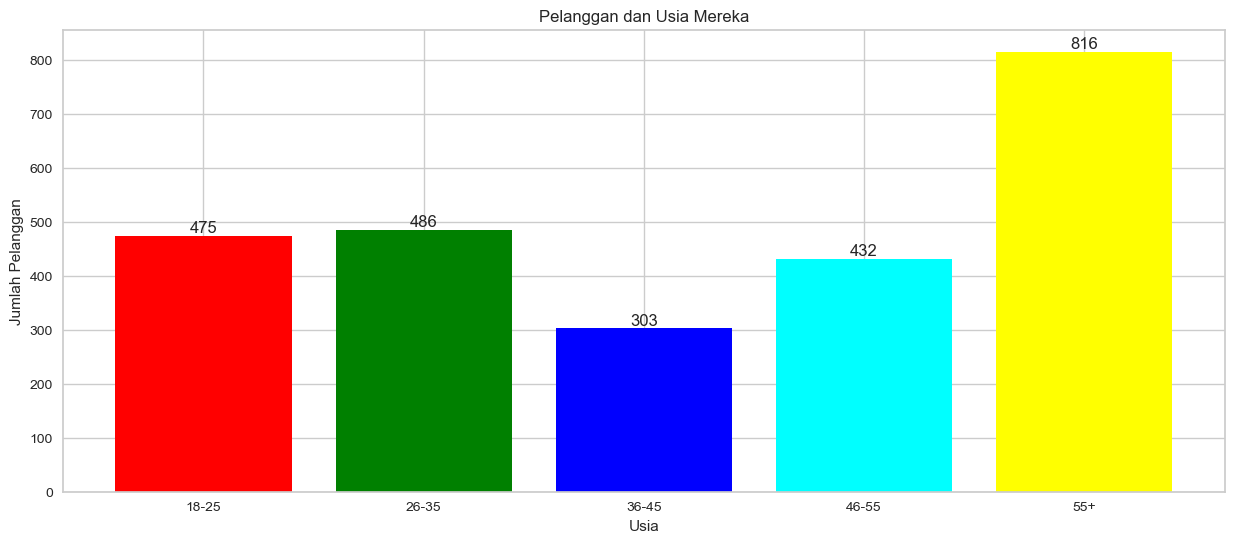

In [27]:
# Mengelompokkan usia pelanggan menggunakan binning
usia18_25 = df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 25)]
usia26_35 = df.CustomerAge[(df.CustomerAge >= 26) & (df.CustomerAge <= 35)]
usia36_45 = df.CustomerAge[(df.CustomerAge >= 36) & (df.CustomerAge <= 45)]
usia46_55 = df.CustomerAge[(df.CustomerAge >= 46) & (df.CustomerAge <= 55)]
usia55keatas = df.CustomerAge[df.CustomerAge >= 56]

# Menyiapkan data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(usia18_25.values), len(usia26_35.values), len(usia36_45.values), len(usia46_55.values), len(usia55keatas.values)]

# Membuat grafik batang untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Pelanggan dan Usia Mereka")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pelanggan")

# Menambahkan label
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

## **Mengelompokkan Saldo Akun Pelanggan dan Visualisasi Distribusi**

Pada tahap ini, kita mengelompokkan saldo akun pelanggan ke dalam beberapa rentang menggunakan teknik **binning**. Setelah itu, kita membuat grafik batang untuk memvisualisasikan distribusi jumlah pelanggan berdasarkan kelompok saldo akun.

### **Langkah-Langkah**
1. **Mengelompokkan Saldo Akun**:
   - Saldo akun pelanggan dikelompokkan ke dalam beberapa rentang:
     - $0 - $3,000
     - $3,001 - $6,000
     - $6,001 - $9,000
     - $9,001 - $12,000
     - $12,001 - $15,000
   - Pengelompokan dilakukan dengan memfilter data berdasarkan kondisi tertentu.

2. **Menyiapkan Data untuk Plotting**:
   - Nama kelompok saldo akun disimpan dalam variabel `aix`.
   - Jumlah pelanggan di setiap kelompok dihitung dan disimpan dalam variabel `aiy`.

3. **Membuat Grafik Batang**:
   - Grafik batang dibuat menggunakan pustaka **Matplotlib**.
   - Warna batang disesuaikan untuk setiap kelompok saldo akun.
   - Label jumlah pelanggan ditambahkan di atas setiap batang.

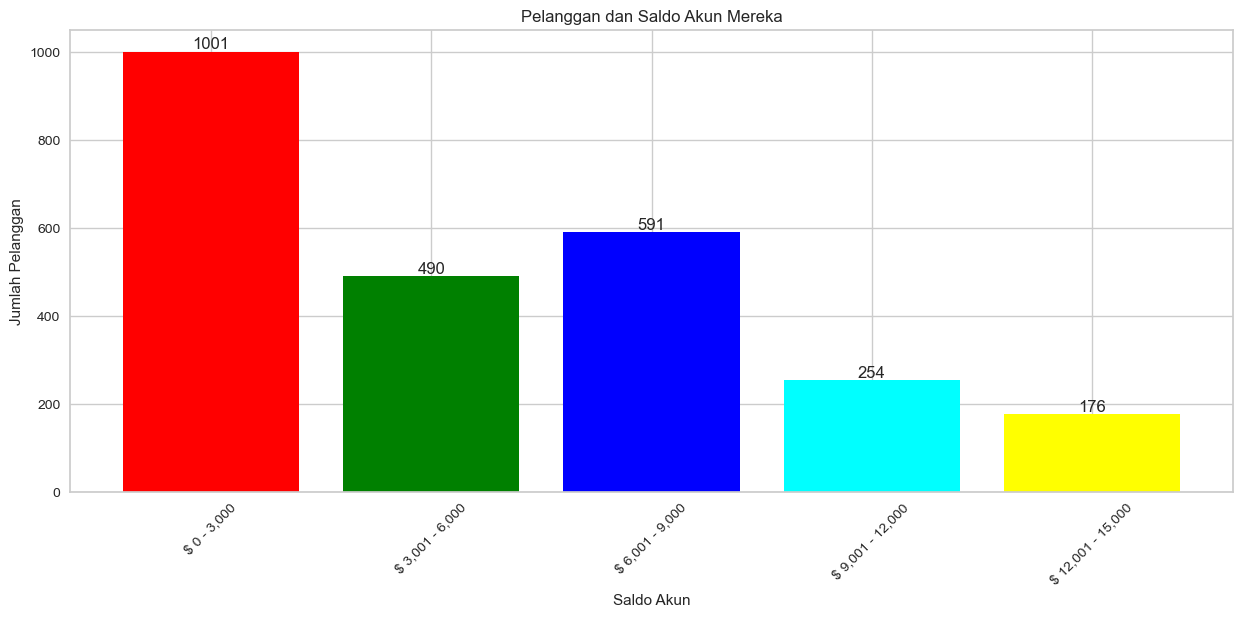

In [28]:
# Mengelompokkan saldo akun pelanggan
ai0_3000 = df['AccountBalance'][(df["AccountBalance"] >= 0) & (df["AccountBalance"] <= 3000)]
ai3001_6000 = df["AccountBalance"][(df["AccountBalance"] >= 3001) & (df["AccountBalance"] <= 6000)]
ai6001_9000 = df["AccountBalance"][(df["AccountBalance"] >= 6001) & (df["AccountBalance"] <= 9000)]
ai9001_12000 = df["AccountBalance"][(df["AccountBalance"] >= 9001) & (df["AccountBalance"] <= 12000)]
ai12001_15000 = df["AccountBalance"][(df["AccountBalance"] >= 12001) & (df["AccountBalance"] <= 15000)]

# Menyiapkan data untuk plotting
aix = ["$ 0 - 3,000", "$ 3,001 - 6,000", "$ 6,001 - 9,000", "$ 9,001 - 12,000", "$ 12,001 - 15,000"]
aiy = [len(ai0_3000.values), len(ai3001_6000.values), len(ai6001_9000.values), len(ai9001_12000.values), len(ai12001_15000.values)]

# Membuat grafik batang untuk distribusi saldo akun
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Pelanggan dan Saldo Akun Mereka")
plt.xlabel("Saldo Akun")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)  # Memutar label x agar mudah dibaca

# Menambahkan label total pelanggan
for i in range(len(aix)):
    plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

## **Mengelompokkan Pelanggan Berdasarkan Variabel Kategorikal**

Pada tahap ini, kita mengelompokkan pelanggan berdasarkan variabel kategorikal seperti **TransactionType**, **Channel**, dan **CustomerOccupation**. Setelah itu, kita membuat grafik batang untuk memvisualisasikan distribusi jumlah pelanggan pada setiap kategori.

### **Langkah-Langkah**
1. **Mengelompokkan Data**:
   - Untuk setiap variabel kategorikal, hitung jumlah pelanggan di setiap kategori menggunakan fungsi `value_counts()`.

2. **Menyiapkan Data untuk Plotting**:
   - Nama kategori disimpan dalam variabel `kategori`.
   - Jumlah pelanggan di setiap kategori disimpan dalam variabel `jumlah_pelanggan`.

3. **Membuat Grafik Batang**:
   - Grafik batang dibuat untuk setiap variabel kategorikal menggunakan pustaka **Matplotlib**.
   - Label jumlah pelanggan ditambahkan di atas setiap batang.

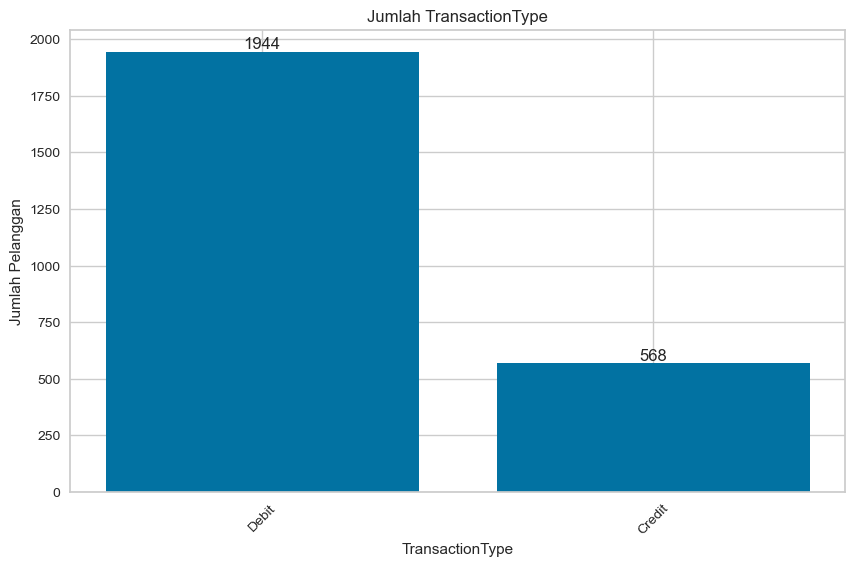

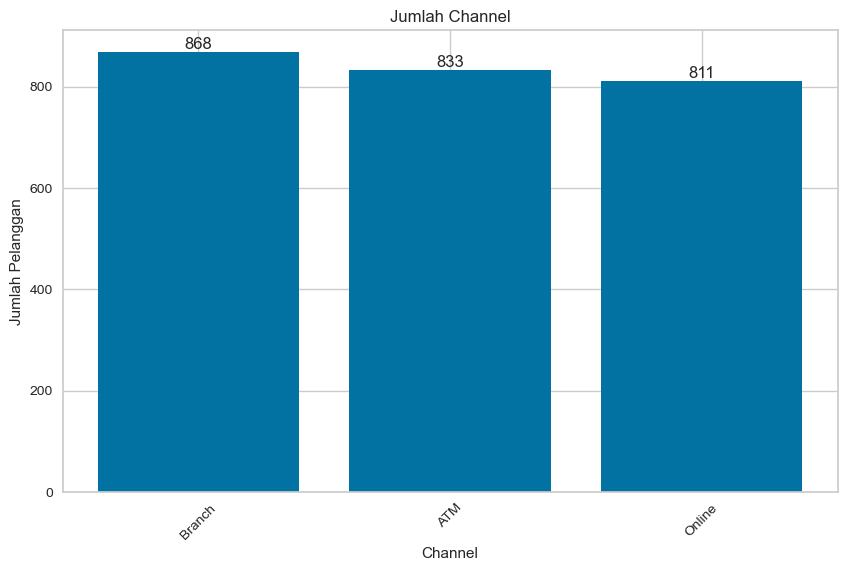

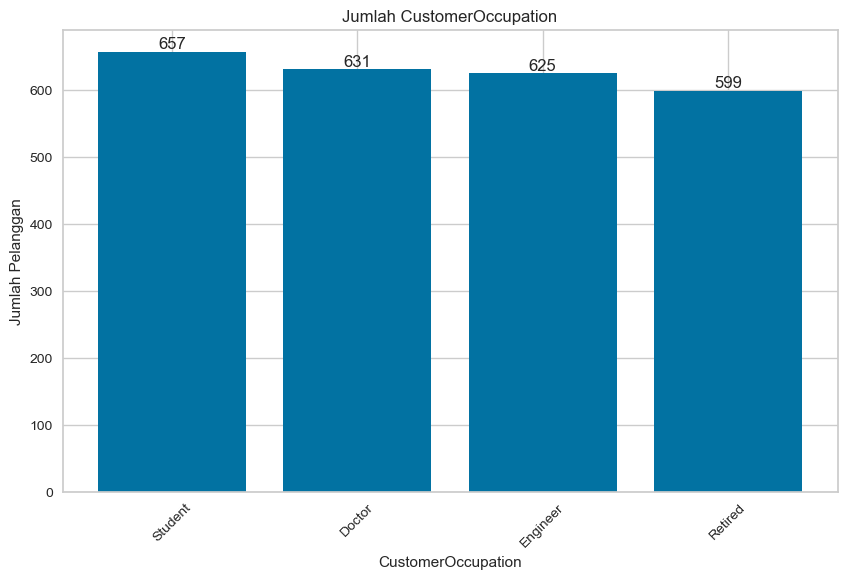

In [29]:
# Mengelompokkan pelanggan berdasarkan variabel kategorikal
variabel_kategorikal = ['TransactionType', 'Channel', 'CustomerOccupation']

for var in variabel_kategorikal:
    jumlah = df[var].value_counts()
    kategori = jumlah.index.tolist()
    jumlah_pelanggan = jumlah.values.tolist()
    
    # Membuat figure untuk grafik batang
    plt.figure(figsize=(10, 6))
    
    # Membuat grafik batang
    plt.bar(kategori, jumlah_pelanggan)
    plt.title(f'Jumlah {var}')
    plt.xlabel(var)
    plt.ylabel('Jumlah Pelanggan')
    plt.xticks(rotation=45)
    
    # Menampilkan nilai di atas grafik batang
    for i, freq in enumerate(jumlah_pelanggan):
        plt.text(i, freq, str(freq), ha='center', va='bottom')
    
    plt.show()

## **Visualisasi Distribusi Fitur Numerik**

Pada tahap ini, kita memvisualisasikan distribusi fitur numerik dalam dataset menggunakan histogram. Histogram membantu memahami distribusi data, seperti apakah data berdistribusi normal, miring, atau memiliki outlier.

### **Langkah-Langkah**
1. **Memilih Fitur Numerik**:
   - Gunakan fungsi `select_dtypes(include=[np.number])` untuk memilih kolom dengan tipe data numerik.

2. **Membuat Histogram**:
   - Untuk setiap kolom numerik, buat histogram menggunakan **Seaborn** (`sns.histplot`).
   - Tambahkan garis **Kernel Density Estimate (KDE)** untuk melihat distribusi data secara lebih halus.

3. **Mengatur Layout**:
   - Gunakan `plt.subplot()` untuk menampilkan beberapa histogram dalam satu figure.
   - Gunakan `plt.tight_layout()` untuk memastikan grafik tidak saling tumpang tindih.

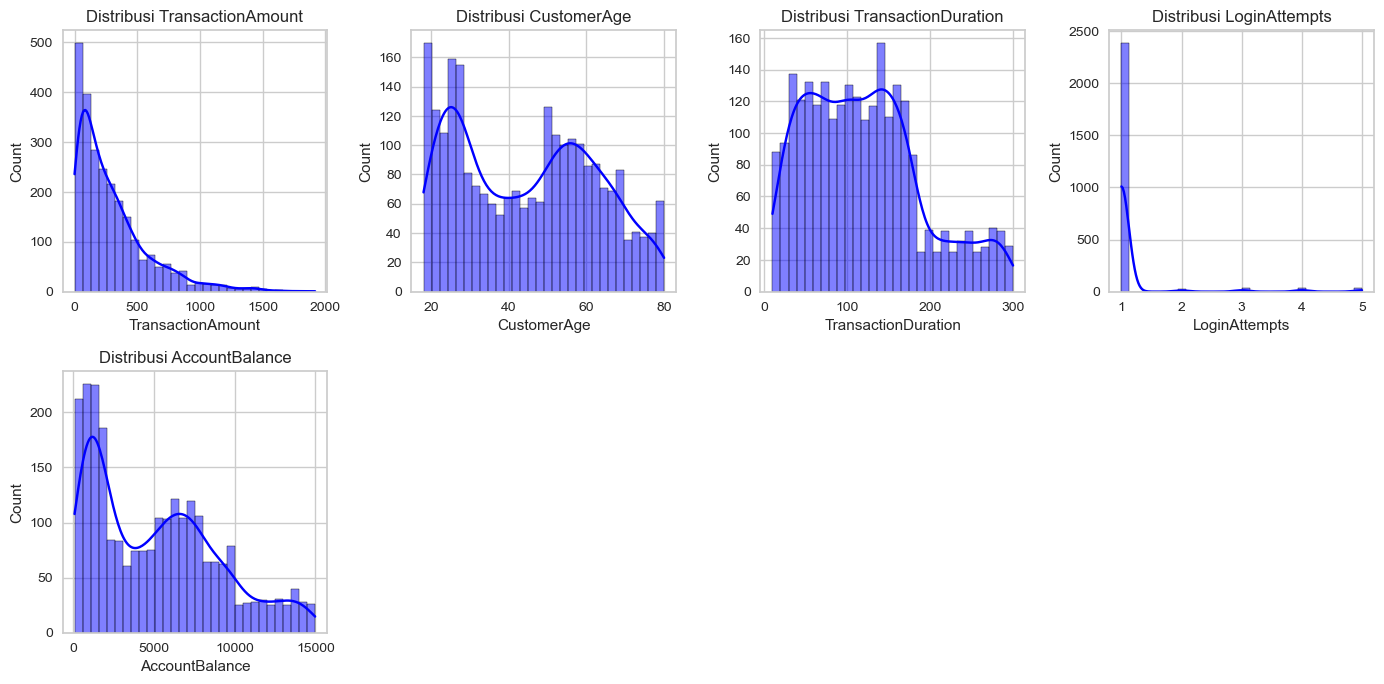

In [30]:
# Distribusi untuk fitur numerik
fitur_numerik = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, kolom in enumerate(fitur_numerik.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[kolom], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {kolom}')
plt.tight_layout()
plt.show()

## **Visualisasi Distribusi Fitur Kategorikal**

Pada tahap ini, kita memvisualisasikan distribusi fitur kategorikal dalam dataset menggunakan grafik batang horizontal. Visualisasi ini membantu memahami jumlah data di setiap kategori untuk fitur kategorikal yang terpilih.

### **Langkah-Langkah**
1. **Memilih Fitur Kategorikal**:
   - Gunakan daftar `variabel_kategorikal` yang berisi nama kolom dengan tipe data kategorikal.

2. **Membuat Grafik Batang Horizontal**:
   - Untuk setiap kolom kategorikal, buat grafik batang horizontal menggunakan **Seaborn** (`sns.countplot`).
   - Warna batang diatur menggunakan palet `viridis`.

3. **Mengatur Layout**:
   - Gunakan `plt.subplot()` untuk menampilkan beberapa grafik dalam satu figure.
   - Gunakan `plt.tight_layout()` untuk memastikan grafik tidak saling tumpang tindih.

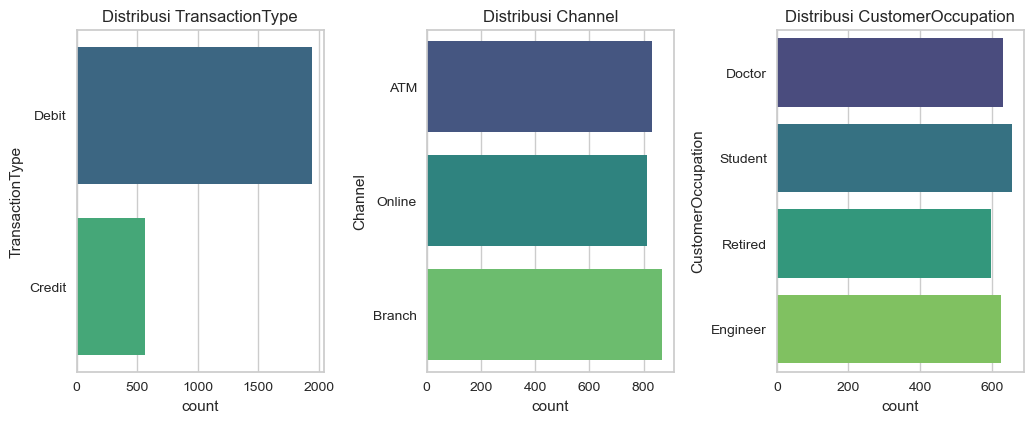

In [31]:
# Distribusi terpilih dari fitur kategorikal
plt.figure(figsize=(14, 8))
for i, kolom in enumerate(variabel_kategorikal, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[kolom], hue=df[kolom], palette='viridis', legend=False)
    plt.title(f'Distribusi {kolom}')
plt.tight_layout()
plt.show()

## **Visualisasi Hubungan Antar Fitur Numerik dengan Pairplot**

Pada tahap ini, kita menggunakan **pairplot** untuk memvisualisasikan hubungan antar fitur numerik dalam dataset. Pairplot membantu dalam memahami pola hubungan antar fitur, seperti korelasi, distribusi, atau keberadaan outlier.

### **Langkah-Langkah**
1. **Memilih Fitur Numerik**:
   - Gunakan dataset yang hanya berisi kolom dengan tipe data numerik.

2. **Membuat Pairplot**:
   - Gunakan fungsi `sns.pairplot()` dari pustaka **Seaborn** untuk membuat scatter plot dan histogram antar fitur numerik.

3. **Menampilkan Plot**:
   - Gunakan `plt.show()` untuk menampilkan hasil visualisasi.

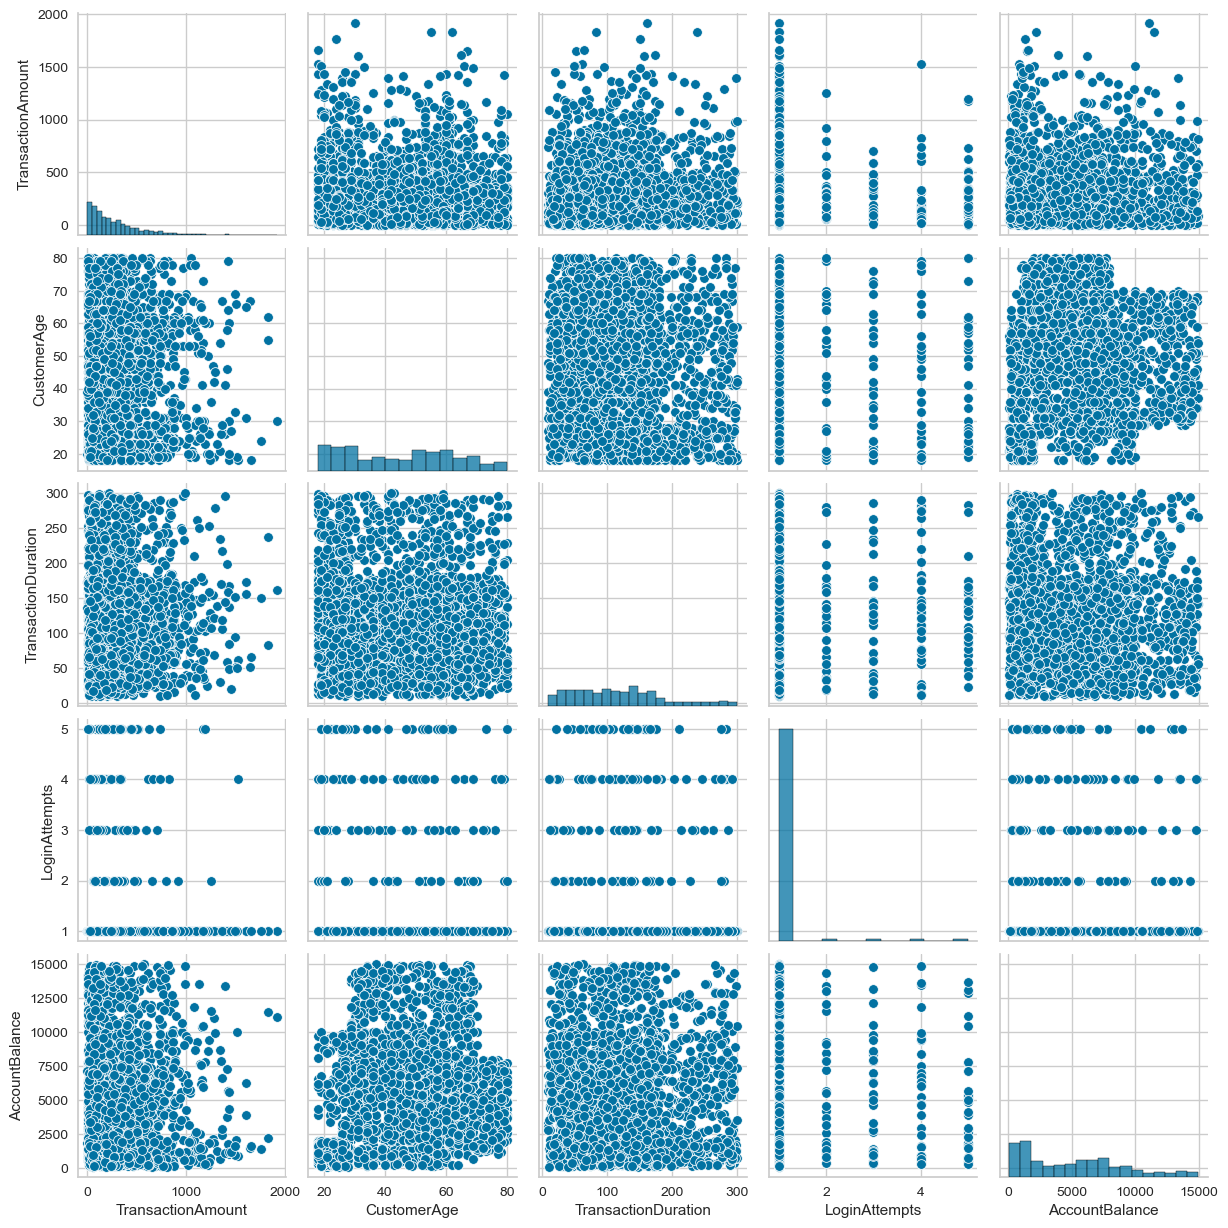

In [32]:
# Pairplot untuk fitur numerik
sns.pairplot(fitur_numerik)
plt.show()

## **Visualisasi Korelasi Antar Fitur Numerik dengan Heatmap**

Pada tahap ini, kita menggunakan **heatmap** untuk memvisualisasikan matriks korelasi antar fitur numerik. Heatmap membantu dalam memahami hubungan antar fitur, seperti korelasi positif atau negatif, yang dapat digunakan untuk analisis lebih lanjut.

### **Langkah-Langkah**
1. **Menghitung Matriks Korelasi**:
   - Gunakan fungsi `corr()` dari pustaka **pandas** untuk menghitung matriks korelasi antar fitur numerik.

2. **Membuat Heatmap**:
   - Gunakan fungsi `sns.heatmap()` dari pustaka **Seaborn** untuk memvisualisasikan matriks korelasi.
   - Tambahkan anotasi untuk menampilkan nilai korelasi pada setiap sel.

3. **Menambahkan Judul dan Menampilkan Heatmap**:
   - Tambahkan judul pada heatmap untuk memberikan konteks visualisasi.
   - Gunakan `plt.show()` untuk menampilkan hasil visualisasi.


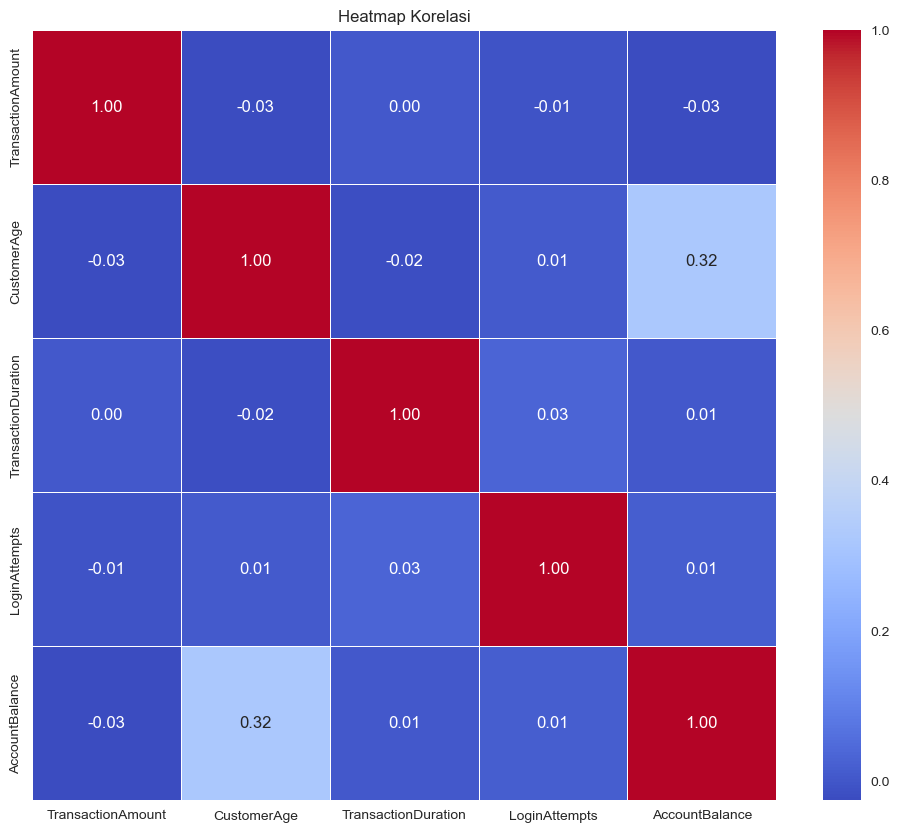

In [33]:
# Membuat figure dengan ukuran 12x10
plt.figure(figsize=(12, 10))

# Menghitung matriks korelasi untuk fitur numerik
matriks_korelasi = fitur_numerik.corr()

# Membuat heatmap untuk matriks korelasi dengan anotasi, menggunakan cmap 'coolwarm', format '.2f', dan linewidths 0.5
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul pada heatmap
plt.title('Heatmap Korelasi')

# Menampilkan heatmap
plt.show()

# **5. Data Preprocessing**

Data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

### **Tahapan Data Preprocessing**
Berikut adalah tahapan-tahapan yang dapat dilakukan, tetapi **tidak terbatas** pada:

1. **Menghapus atau Menangani Data Kosong (Missing Values)**:
   - Identifikasi nilai kosong menggunakan fungsi seperti `isnull()` atau `isna()`.
   - Tangani nilai kosong dengan:
     - Mengisi nilai kosong menggunakan rata-rata, median, atau modus.
     - Menghapus baris atau kolom dengan nilai kosong jika proporsinya signifikan.

2. **Menghapus Data Duplikat**:
   - Gunakan fungsi `drop_duplicates()` untuk menghapus data yang duplikat.

3. **Normalisasi atau Standarisasi Fitur**:
   - Normalisasi: Mengubah data ke rentang [0, 1] menggunakan `MinMaxScaler`.
   - Standarisasi: Mengubah data agar memiliki rata-rata 0 dan standar deviasi 1 menggunakan `StandardScaler`.

4. **Deteksi dan Penanganan Outlier**:
   - Gunakan metode seperti IQR (Interquartile Range) atau Z-Score untuk mendeteksi outlier.
   - Tangani outlier dengan:
     - Menghapus data outlier.
     - Menggunakan teknik transformasi data.

5. **Encoding Data Kategorikal**:
   - Gunakan teknik encoding seperti:
     - **One-Hot Encoding** untuk data kategorikal nominal.
     - **Label Encoding** untuk data kategorikal ordinal.

6. **Binning (Pengelompokan Data)**:
   - Kelompokkan data numerik ke dalam rentang tertentu untuk analisis yang lebih mudah.

### **Catatan**
- Tahapan preprocessing dapat disesuaikan dengan karakteristik data yang digunakan.
- Pastikan untuk memvalidasi hasil preprocessing sebelum melanjutkan ke tahap analisis atau pemodelan.

### **Tujuan**
- Membersihkan data dari masalah seperti nilai kosong, duplikasi, atau outlier.
- Memastikan data dalam format yang sesuai untuk analisis atau pemodelan machine learning.

In [34]:
# Menyalin dataframe df untuk preprocessing
df_preprocessed = df.copy()

# Menampilkan informasi tentang dataframe yang telah disalin
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [35]:
# Memeriksa duplikasi
duplikat = df_preprocessed.duplicated().sum()
print(f"Jumlah baris duplikat: {duplikat}")

# Memeriksa nilai yang hilang
nilai_hilang = df_preprocessed.isnull().sum()
print("Nilai yang hilang di setiap kolom:")
print(nilai_hilang)

Jumlah baris duplikat: 0
Nilai yang hilang di setiap kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## **Mengubah Tipe Data Menjadi Datetime**

Pada tahap ini, kita mengubah tipe data kolom tertentu dari tipe **object** menjadi **datetime**. Langkah ini penting untuk memastikan data tanggal dapat digunakan dengan benar dalam analisis waktu atau perhitungan berbasis tanggal.

### **Langkah-Langkah**
1. **Mengidentifikasi Kolom yang Dibutuhkan**:
   - Pilih kolom yang berisi data tanggal dalam bentuk string atau object.

2. **Mengubah Tipe Data**:
   - Gunakan fungsi `pd.to_datetime()` dari pustaka **pandas** untuk mengonversi tipe data menjadi datetime.

3. **Menampilkan Informasi Dataframe**:
   - Gunakan fungsi `info()` untuk memverifikasi perubahan tipe data dan melihat informasi tentang dataframe yang telah diproses.

In [36]:
# Mengubah tipe data dari object menjadi datetime
kolom_yang_dibutuhkan = ['TransactionDate', 'PreviousTransactionDate']
for kolom in kolom_yang_dibutuhkan: 
    df_preprocessed[kolom] = pd.to_datetime(df_preprocessed[kolom])

# Menampilkan informasi tentang dataframe yang telah diproses
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [37]:
# Menghapus kolom yang tidak digunakan
kolom_yang_dihapus = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'LoginAttempts']
df_preprocessed.drop(columns=kolom_yang_dihapus, inplace=True)

# Menampilkan informasi tentang dataframe yang telah diproses
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   TransactionType          2512 non-null   object        
 3   Location                 2512 non-null   object        
 4   Channel                  2512 non-null   object        
 5   CustomerAge              2512 non-null   int64         
 6   CustomerOccupation       2512 non-null   object        
 7   TransactionDuration      2512 non-null   int64         
 8   AccountBalance           2512 non-null   float64       
 9   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 196.4+ KB


In [38]:
# Menambahkan kolom hari antara transaksi terakhir
df_preprocessed["HariAntarTransaksi"] = (df_preprocessed["PreviousTransactionDate"] - df_preprocessed["TransactionDate"]).dt.days

# Menampilkan 5 baris pertama dari dataframe yang telah diproses
df_preprocessed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate,HariAntarTransaksi
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,5112.21,2024-11-04 08:08:08,572
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,13758.91,2024-11-04 08:09:35,495
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1122.35,2024-11-04 08:07:04,482
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,8569.06,2024-11-04 08:09:06,548
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,7429.40,2024-11-04 08:06:39,384


In [39]:
# Mendapatkan semua fitur numerik
fitur_numerik = df_preprocessed.select_dtypes(include=['number']).columns

# Menampilkan fitur numerik
print(fitur_numerik)

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'AccountBalance', 'HariAntarTransaksi'],
      dtype='object')


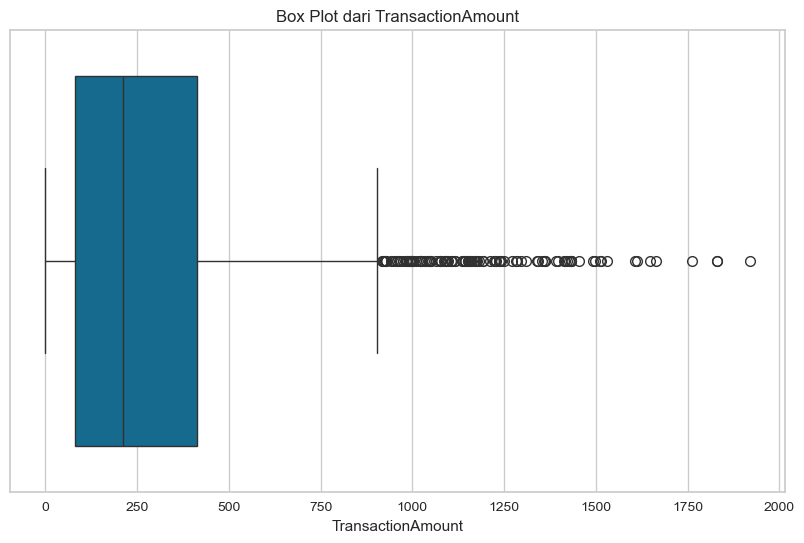

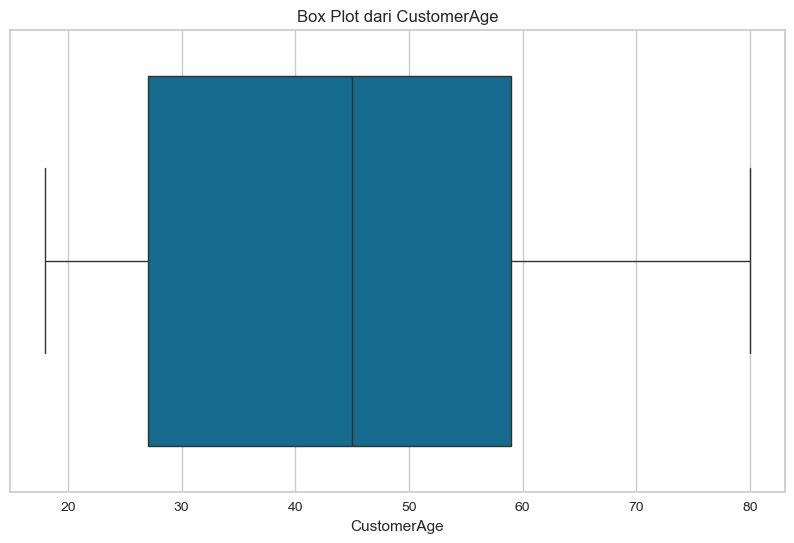

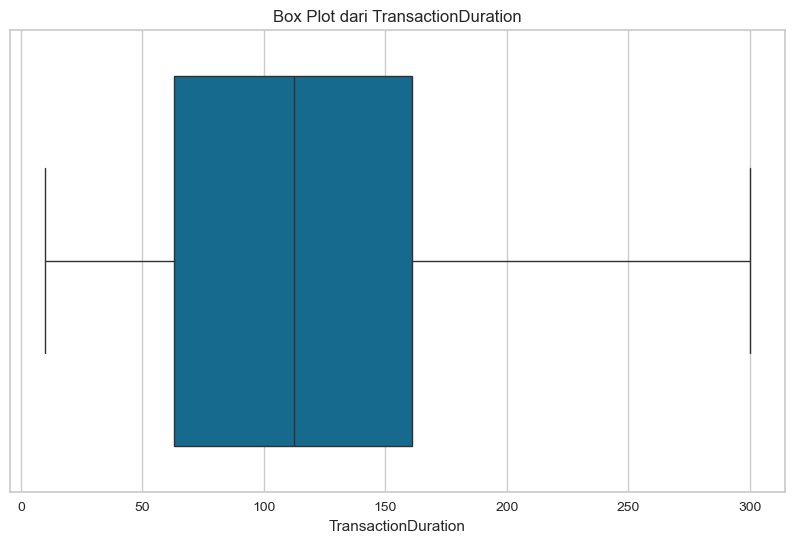

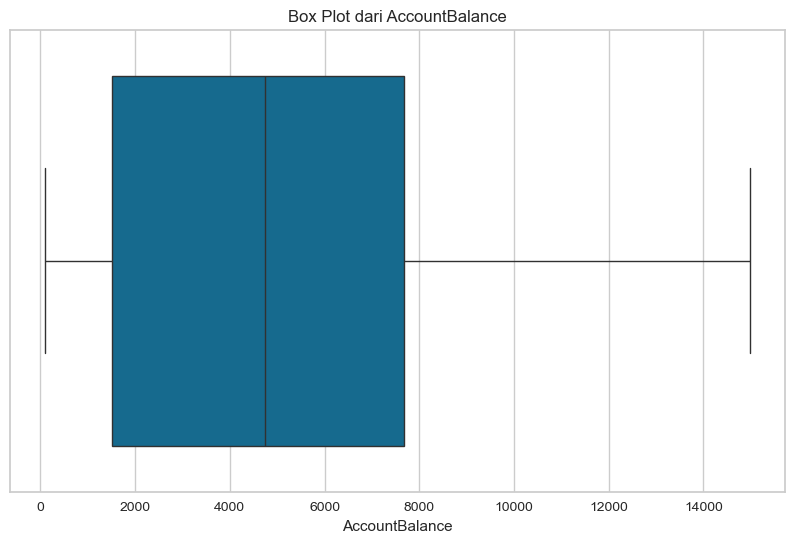

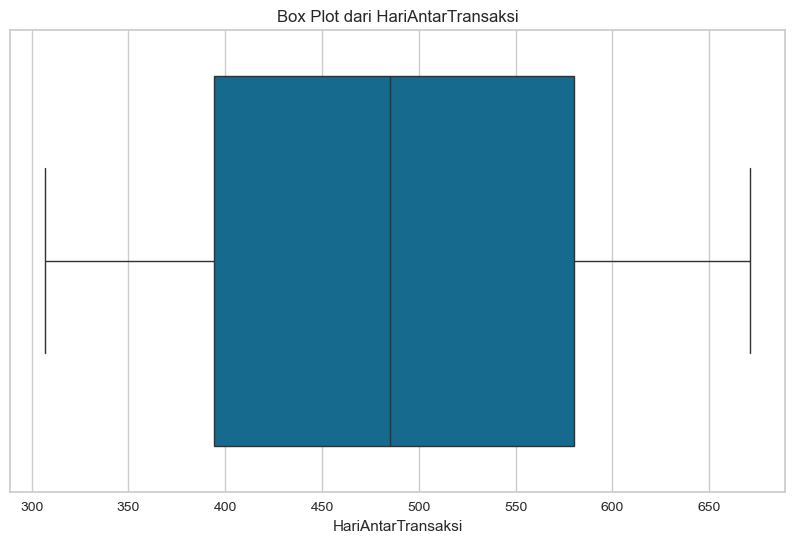

In [40]:
# Membuat plot untuk mendeteksi outlier
for fitur in fitur_numerik:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_preprocessed[fitur])
    plt.title(f'Box Plot dari {fitur}')
    plt.show()

In [41]:
# Menangani outlier
for fitur in fitur_numerik:
    Q1 = df_preprocessed[fitur].quantile(0.25)
    Q3 = df_preprocessed[fitur].quantile(0.75)
    IQR = Q3 - Q1  # Rentang antar kuartil (Interquartile Range)
    
    # Biarkan outlier pada fitur 'TransactionAmount' dan 'AccountBalance'
    if fitur not in ['TransactionAmount', 'AccountBalance']:
        # Filter dataframe untuk menghapus outlier
        kondisi = ~((df_preprocessed[fitur] < (Q1 - 1.5 * IQR)) | (df_preprocessed[fitur] > (Q3 + 1.5 * IQR)))
        df_preprocessed_filtered_numeric = df_preprocessed.loc[kondisi, fitur_numerik]

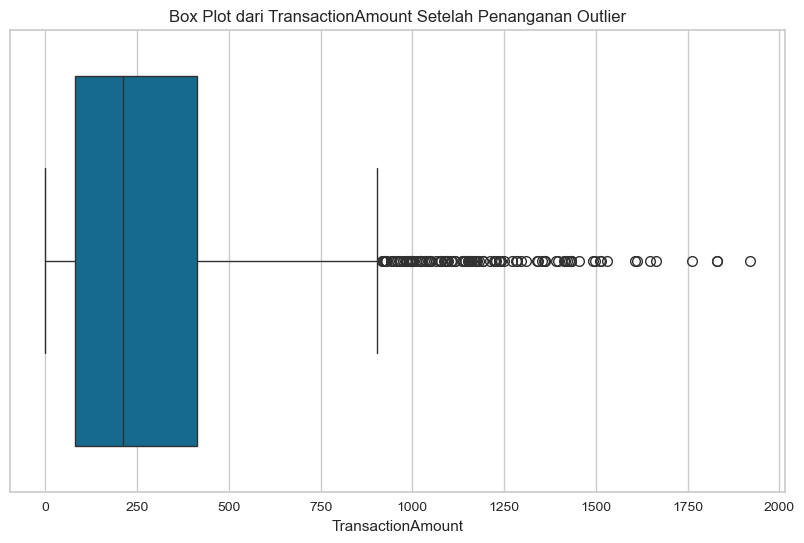

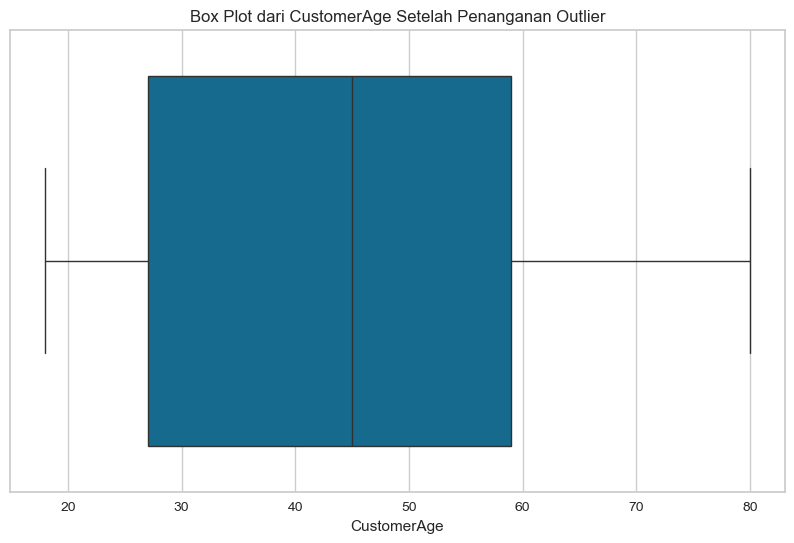

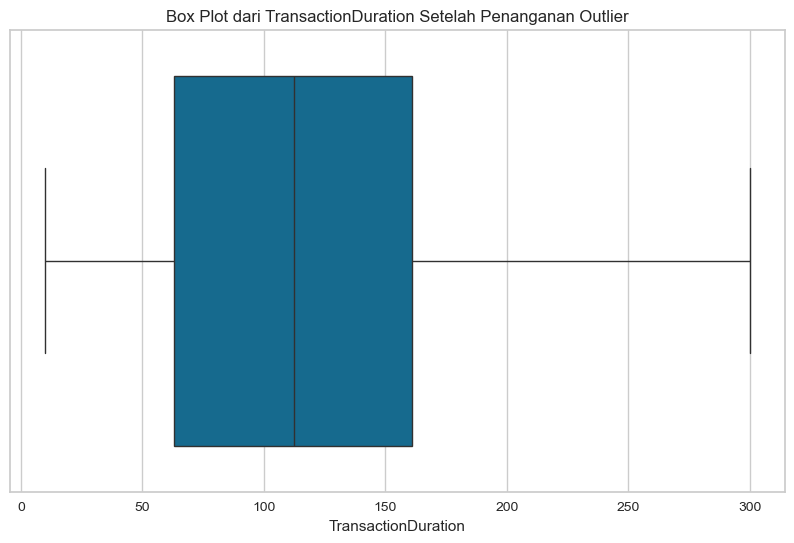

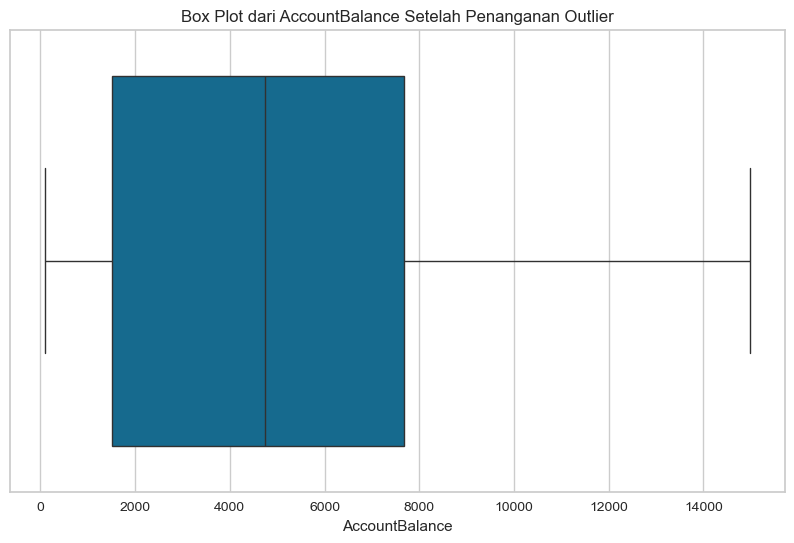

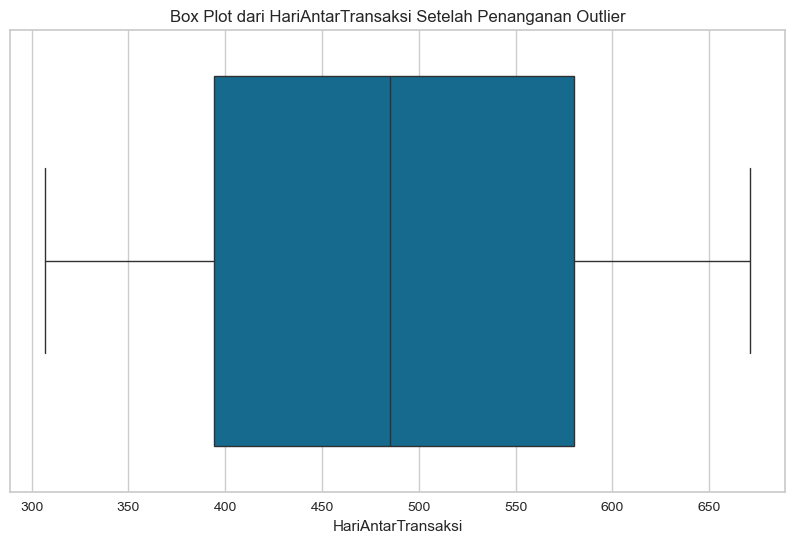

In [42]:
# Melakukan plotting untuk setiap fitur numerik setelah penanganan outlier
for fitur in fitur_numerik:
    plt.figure(figsize=(10, 6))  # Mengatur ukuran figure
    sns.boxplot(x=df_preprocessed[fitur])  # Membuat box plot untuk fitur
    plt.title(f'Box Plot dari {fitur} Setelah Penanganan Outlier')  # Menambahkan judul pada plot
    plt.show()  # Menampilkan plot

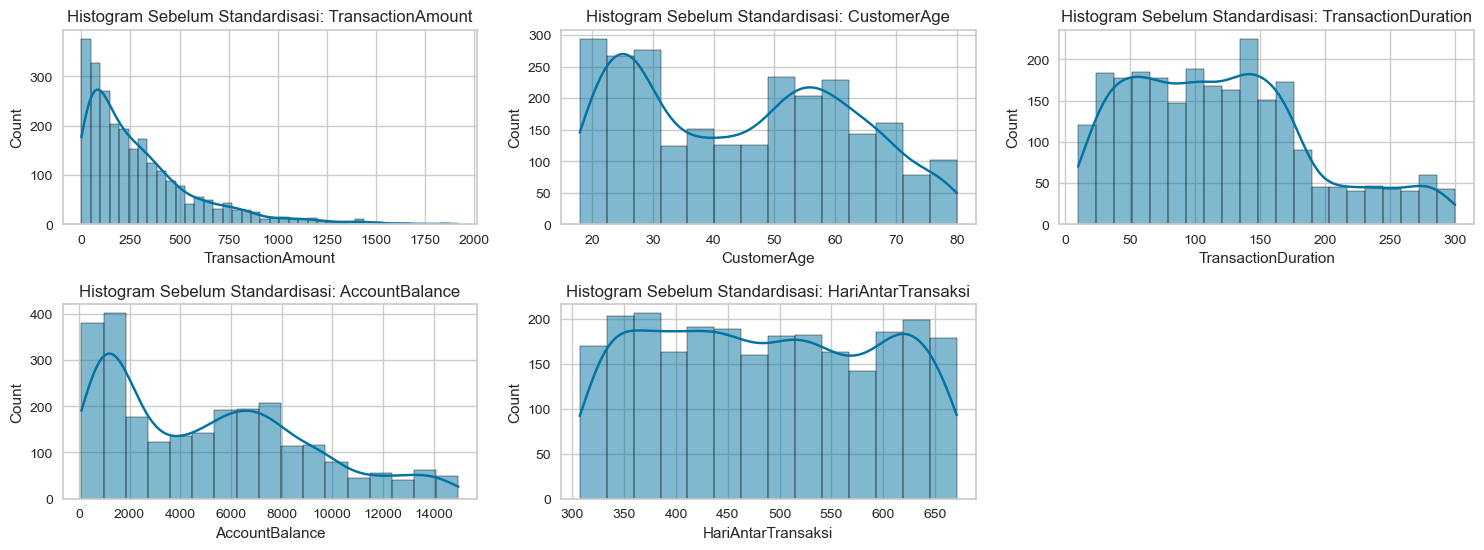

In [43]:
# Menampilkan Histogram sebelum Standardisasi
plt.figure(figsize=(15, 8))
for i, fitur in enumerate(fitur_numerik):
    plt.subplot(3, 3, i+1)  # Membuat subplot untuk setiap fitur numerik
    sns.histplot(df_preprocessed[fitur], kde=True)  # Membuat histogram dengan KDE (Kernel Density Estimate)
    plt.title(f"Histogram Sebelum Standardisasi: {fitur}")  # Menambahkan judul pada setiap subplot
plt.tight_layout()  # Mengatur tata letak subplot agar tidak saling tumpang tindih
plt.show()  # Menampilkan plot

In [44]:
# Standarisasi Data Numerik
scaler = StandardScaler()
df_preprocessed[fitur_numerik] = scaler.fit_transform(df_preprocessed[fitur_numerik])


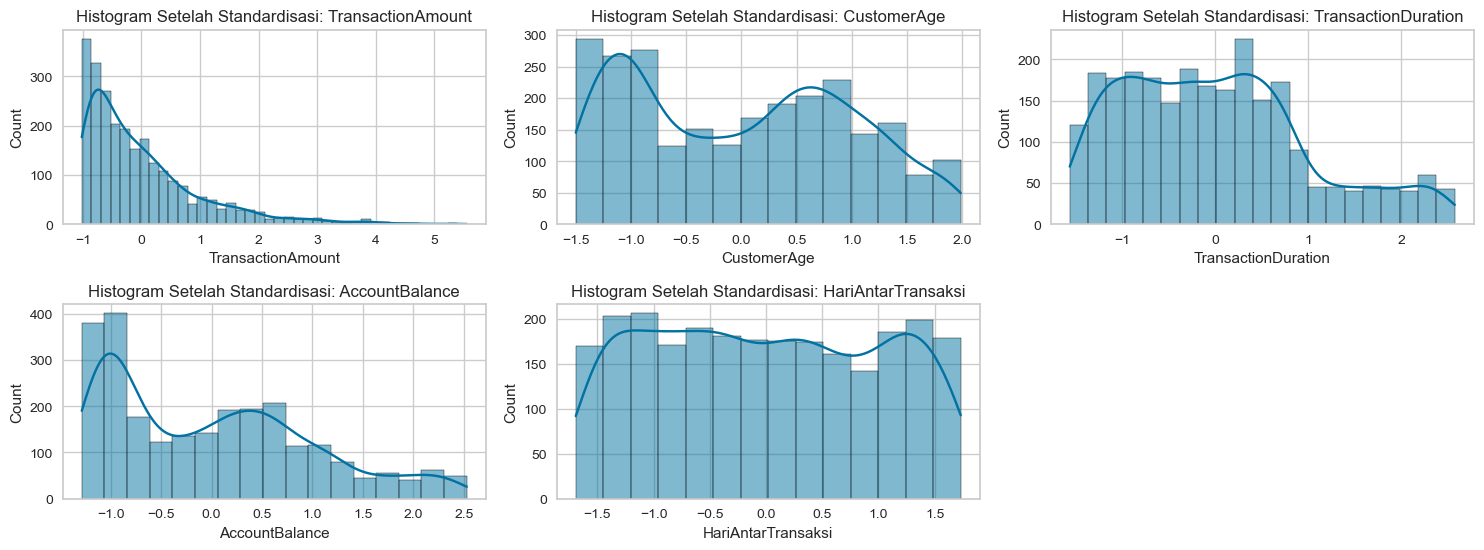

In [45]:
# Menampilkan Histogram Setelah Standardisasi
plt.figure(figsize=(15, 8))
for i, fitur in enumerate(fitur_numerik):
    plt.subplot(3, 3, i+1)  # Membuat subplot untuk setiap fitur numerik
    sns.histplot(df_preprocessed[fitur], kde=True)  # Membuat histogram dengan KDE (Kernel Density Estimate)
    plt.title(f"Histogram Setelah Standardisasi: {fitur}")  # Menambahkan judul pada setiap subplot
plt.tight_layout()  # Mengatur tata letak subplot agar tidak saling tumpang tindih
plt.show()  # Menampilkan plot

In [46]:
# Mendapatkan semua fitur kategorikal
fitur_kategorikal = df_preprocessed.select_dtypes(include=['object']).columns

# Menampilkan fitur kategorikal
print(fitur_kategorikal)

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')


In [47]:
# Menampilkan data sebelum Label Encoding
print("Data Sebelum Label Encoding:")
print(df_preprocessed[fitur_kategorikal].head())

Data Sebelum Label Encoding:
  TransactionType   Location Channel CustomerOccupation
0           Debit  San Diego     ATM             Doctor
1           Debit    Houston     ATM             Doctor
2           Debit       Mesa  Online            Student
3           Debit    Raleigh  Online            Student
4          Credit    Atlanta  Online            Student


In [48]:
# Label Encoding untuk Data Kategorikal
label_encoders = {}  # Dictionary untuk menyimpan encoder label
df_lencoder = df_preprocessed.copy()  # Menyalin dataframe yang telah dipreproses

# Melakukan encoding pada setiap fitur kategorikal
for kolom in variabel_kategorikal:
    label_encoders[kolom] = LabelEncoder()  # Membuat instance LabelEncoder untuk setiap kolom
    df_lencoder[kolom] = label_encoders[kolom].fit_transform(df_preprocessed[kolom])  # Melakukan fit dan transform pada kolom

# Menampilkan 5 baris pertama dari dataframe yang telah di-encode
print(df_lencoder.head())

   TransactionAmount     TransactionDate  TransactionType   Location  Channel  \
0          -0.971275 2023-04-11 16:29:14                1  San Diego        0   
1           0.269440 2023-06-27 16:44:19                1    Houston        0   
2          -0.586882 2023-07-10 18:16:08                1       Mesa        2   
3          -0.387456 2023-05-05 16:32:11                1    Raleigh        2   
4          -0.973468 2023-10-16 17:51:24                0    Atlanta        2   

   CustomerAge  CustomerOccupation  TransactionDuration  AccountBalance  \
0     1.423718                   0            -0.552443       -0.000537   
1     1.311287                   0             0.305314        2.216472   
2    -1.443277                   3            -0.909842       -1.023534   
3    -1.049768                   3            -1.353017        0.885797   
4    -1.049768                   3             1.120184        0.593589   

  PreviousTransactionDate  HariAntarTransaksi  
0     2024-11-

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

c:\Users\adity\.conda\envs\machine-learning-dicoding\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\adity\.conda\envs\machine-learning-dicoding\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\adity\.conda\envs\machine-learning-dicoding\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\adity\.conda\envs\machine-learning-dicoding\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\adity\.conda\envs\machine-learning-dicoding\lib\subprocess.py"

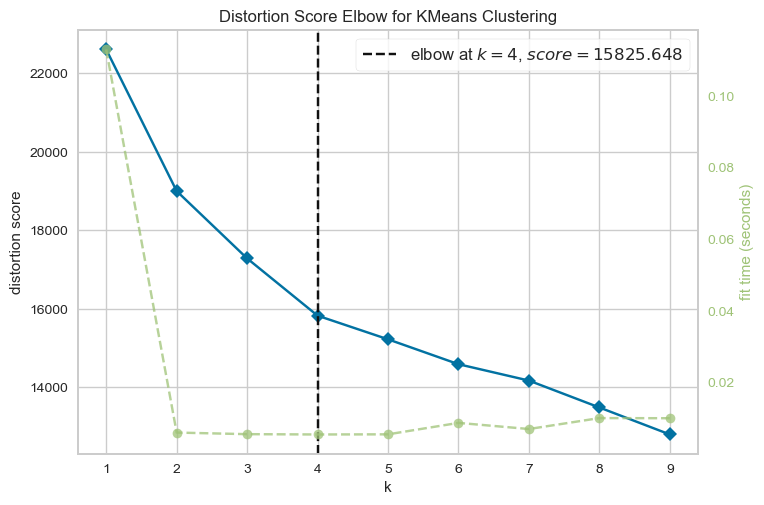

<Figure size 1000x600 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [49]:
# Mengimpor pustaka yang diperlukan
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import pandas as pd

# Membuat salinan fitur untuk clustering agar tidak mengubah dataframe asli
fitur_untuk_clustering = df_lencoder[['TransactionAmount', 'AccountBalance', 'CustomerAge', 
                                      'CustomerOccupation', 'HariAntarTransaksi', 'Channel', 
                                      'TransactionType', 'Location', 'TransactionDuration']].copy()

# Memeriksa apakah ada kolom yang masih bertipe kategorikal (object)
kolom_kategorikal = fitur_untuk_clustering.select_dtypes(include=['object']).columns

# Menerapkan label encoding pada kolom kategorikal yang tersisa
label_encoder = LabelEncoder()
for kolom in kolom_kategorikal:
    fitur_untuk_clustering[kolom] = label_encoder.fit_transform(fitur_untuk_clustering[kolom])

# Melakukan standarisasi pada fitur
scaler = StandardScaler()
fitur_terstandarisasi = scaler.fit_transform(fitur_untuk_clustering)

# Melanjutkan dengan clustering menggunakan KMeans
kmeans = KMeans(random_state=42)

# Menggunakan visualisasi Elbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(fitur_terstandarisasi)

# Menampilkan hasil visualisasi
plt.figure(figsize=(10, 6))
visualizer.show(outpath=None)
plt.tight_layout()
plt.show()

In [50]:
# Inisialisasi Model KMeans dengan jumlah cluster optimal
model_kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans.fit(fitur_untuk_clustering)  # Melatih model dengan fitur yang dipilih

# Mendapatkan label cluster
cluster_labels = model_kmeans.labels_

# Menentukan jumlah cluster
k = 3

# Fungsi untuk menganalisis karakteristik setiap cluster
def analisis_cluster(X, cluster_labels, k):
    print("Analisis Karakteristik Cluster:")
    for cluster_id in range(k):
        # Memfilter data berdasarkan label cluster
        data_cluster = X[cluster_labels == cluster_id]
        
        # Menghitung nilai rata-rata untuk fitur numerik dalam cluster
        rata_rata_jumlah_transaksi = data_cluster['TransactionAmount'].mean()
        rata_rata_saldo_akun = data_cluster['AccountBalance'].mean()
        rata_rata_usia_pelanggan = data_cluster['CustomerAge'].mean()
        rata_rata_hari_antar_transaksi = data_cluster['HariAntarTransaksi'].mean()
        
        # Menghitung nilai modus untuk fitur kategorikal dalam cluster
        modus_channel = data_cluster['Channel'].mode().values[0]
        modus_pekerjaan_pelanggan = data_cluster['CustomerOccupation'].mode().values[0]
        
        # Menampilkan hasil analisis untuk setiap cluster
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Jumlah Transaksi: {rata_rata_jumlah_transaksi}")
        print(f"Rata-rata Saldo Akun: {rata_rata_saldo_akun}")
        print(f"Rata-rata Usia Pelanggan: {rata_rata_usia_pelanggan}")
        print(f"Rata-rata Hari Antar Transaksi: {rata_rata_hari_antar_transaksi}")
        print(f"Modus Channel: {modus_channel}")
        print(f"Modus Pekerjaan Pelanggan: {modus_pekerjaan_pelanggan}")

# Menganalisis karakteristik setiap cluster
analisis_cluster(fitur_untuk_clustering, cluster_labels, k)


Analisis Karakteristik Cluster:

Cluster 1:
Rata-rata Jumlah Transaksi: 0.020872609056587745
Rata-rata Saldo Akun: 0.006464093231016509
Rata-rata Usia Pelanggan: -0.02859850148684088
Rata-rata Hari Antar Transaksi: -0.009700299872505145
Modus Channel: 1
Modus Pekerjaan Pelanggan: 3

Cluster 2:
Rata-rata Jumlah Transaksi: -0.001337558076322205
Rata-rata Saldo Akun: 0.010033792511952298
Rata-rata Usia Pelanggan: 0.02582366845020713
Rata-rata Hari Antar Transaksi: -0.01649603417045172
Modus Channel: 1
Modus Pekerjaan Pelanggan: 3

Cluster 3:
Rata-rata Jumlah Transaksi: -0.021858185153424046
Rata-rata Saldo Akun: -0.015857245429103193
Rata-rata Usia Pelanggan: 0.009080955118146123
Rata-rata Hari Antar Transaksi: 0.025047650410008584
Modus Channel: 1
Modus Pekerjaan Pelanggan: 1


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [51]:
# Mengevaluasi model menggunakan Silhouette Score
# Silhouette Score digunakan untuk mengukur kualitas clustering. Nilai berkisar antara -1 hingga 1.
# Semakin tinggi nilainya, semakin baik pemisahan antar cluster.
silhouette_avg = silhouette_score(fitur_untuk_clustering, cluster_labels)

# Menampilkan hasil Silhouette Score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4894259923162318


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Fitur yang Terpilih: Index(['AccountBalance', 'CustomerAge', 'Channel', 'TransactionType',
       'Location'],
      dtype='object')


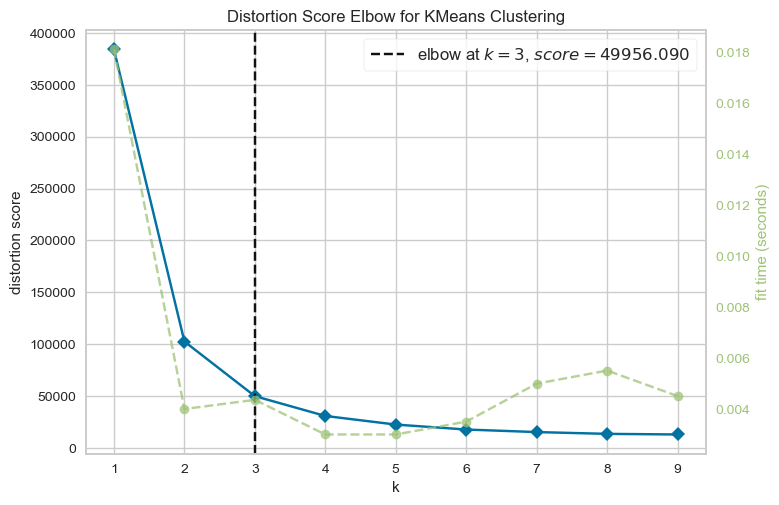

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# Inisialisasi model Logistic Regression untuk RFE
model_rfe = LogisticRegression(max_iter=500)

# Inisialisasi RFE dengan model Logistic Regression dan jumlah fitur yang akan dipilih
rfe_selector = RFE(model_rfe, n_features_to_select=5)

# Melatih RFE dengan data fitur dan label cluster
rfe_selector.fit(fitur_untuk_clustering, cluster_labels)

# Mendapatkan fitur yang terpilih berdasarkan RFE
selected_features_from_rfe = fitur_untuk_clustering.columns[rfe_selector.get_support(indices=True)]
print("Fitur yang Terpilih:", selected_features_from_rfe)

# Menggunakan Metode Elbow untuk menentukan jumlah cluster optimal setelah seleksi fitur
visualizer_rfe = KElbowVisualizer(kmeans, k=(1, 10))

# Melatih visualizer dengan data fitur yang telah diseleksi
visualizer_rfe.fit(fitur_untuk_clustering[selected_features_from_rfe])

# Menampilkan hasil visualisasi Elbow
visualizer_rfe.show()


In [53]:
# Menyalin dataframe berdasarkan fitur yang dipilih dari RFE
k_means_rfe = fitur_untuk_clustering[selected_features_from_rfe]

# Membangun ulang model KMeans dengan fitur yang telah dipilih
model_kmeans_rfe = KMeans(n_clusters=3, random_state=0)
model_kmeans_rfe.fit(k_means_rfe)  # Melatih model dengan data fitur yang telah dipilih

# Mendapatkan label cluster dari model
cluster_labels_rfe = model_kmeans_rfe.labels_

# Mengevaluasi model menggunakan Silhouette Score
# Silhouette Score digunakan untuk mengukur kualitas clustering
silhouette_avg_rfe = silhouette_score(fitur_untuk_clustering[selected_features_from_rfe], cluster_labels_rfe)

# Menampilkan hasil Silhouette Score sebelum dan sesudah seleksi fitur
print(f"Silhouette Score sebelum Seleksi Fitur: {silhouette_avg}")
print(f"Silhouette Score setelah Seleksi Fitur: {silhouette_avg_rfe}")

Silhouette Score sebelum Seleksi Fitur: 0.4894259923162318
Silhouette Score setelah Seleksi Fitur: 0.5359736779725359


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

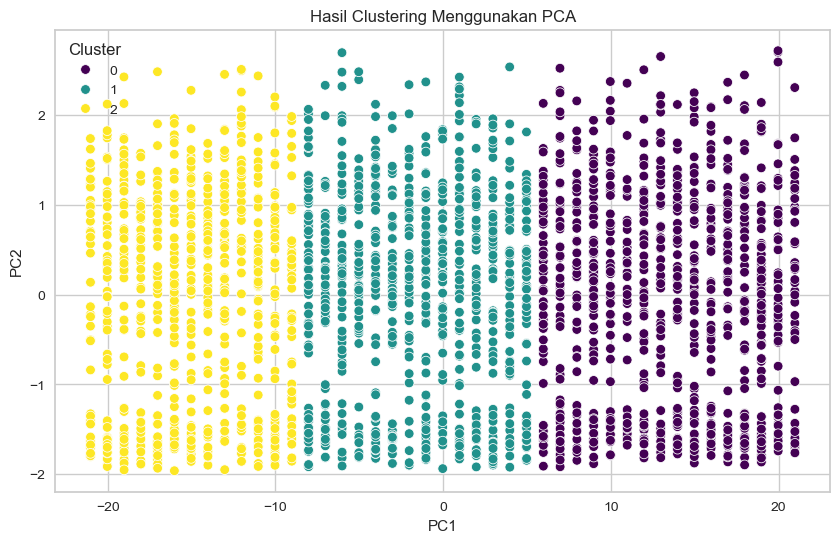

In [54]:
# Visualisasi hasil clustering menggunakan PCA
# PCA digunakan untuk mereduksi dimensi data menjadi 2 komponen utama
pca = PCA(n_components=2)  # Inisialisasi PCA dengan 2 komponen
pca_components = pca.fit_transform(k_means_rfe)  # Menerapkan PCA pada data clustering
df_viz = pd.DataFrame(pca_components, columns=["PC1", "PC2"])  # Membuat DataFrame untuk komponen PCA
df_viz["Cluster"] = cluster_labels_rfe  # Menambahkan label cluster ke DataFrame

# Membuat scatter plot untuk visualisasi hasil clustering
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure
sns.scatterplot(data=df_viz, x="PC1", y="PC2", hue="Cluster", palette="viridis")  # Membuat scatter plot dengan warna berdasarkan cluster
plt.title("Hasil Clustering Menggunakan PCA")  # Menambahkan judul pada plot
plt.show()  # Menampilkan plot

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [55]:
# Menambahkan label cluster ke dalam dataframe asli
df_normalized = k_means_rfe.copy()  # Menyalin dataframe hasil clustering
df_normalized['Cluster'] = cluster_labels_rfe  # Menambahkan kolom 'Cluster' berdasarkan hasil clustering

# Menampilkan data sebelum dilakukan inverse transform
print("Data Sebelum Inverse Transform:")
print(df_normalized.head())

# Melakukan Inverse Transform untuk Data Kategorikal
# Mengembalikan data kategorikal yang telah di-encode ke bentuk aslinya
df_normalized['Channel'] = label_encoders['Channel'].inverse_transform(df_normalized['Channel'])
df_normalized['TransactionType'] = label_encoders['TransactionType'].inverse_transform(df_normalized['TransactionType'])
# Ensure the 'Location' column is not processed if it was not encoded
if 'Location' in label_encoders:
	df_normalized['Location'] = label_encoders['Location'].inverse_transform(df_normalized['Location'])
else:
	print("The 'Location' column was not encoded, skipping inverse transformation for this column.")

# Menampilkan data setelah dilakukan inverse transform
print("\nData Setelah Inverse Transform:")
print(df_normalized.head())

Data Sebelum Inverse Transform:
   AccountBalance  CustomerAge  Channel  TransactionType  Location  Cluster
0       -0.000537     1.423718        0                1        36        0
1        2.216472     1.311287        0                1        15        1
2       -1.023534    -1.443277        2                1        23        1
3        0.885797    -1.049768        2                1        33        0
4        0.593589    -1.049768        2                0         1        2
The 'Location' column was not encoded, skipping inverse transformation for this column.

Data Setelah Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType  Location  Cluster
0       -0.000537     1.423718     ATM           Debit        36        0
1        2.216472     1.311287     ATM           Debit        15        1
2       -1.023534    -1.443277  Online           Debit        23        1
3        0.885797    -1.049768  Online           Debit        33        0
4        0.593589    

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [56]:
from sklearn.preprocessing import StandardScaler

# Menampilkan data sebelum dilakukan inverse transform
print("Data Sebelum Inverse Transform:")
print(df_normalized.head())

# Fitur numerik yang akan digunakan
fitur_numerik = ['AccountBalance', 'CustomerAge']

# Membuat scaler baru untuk fitur yang dipilih
scaler_selected = StandardScaler()
scaler_selected.mean_ = scaler.mean_[:len(fitur_numerik)]  # Mengambil nilai mean dari scaler asli untuk fitur yang dipilih
scaler_selected.scale_ = scaler.scale_[:len(fitur_numerik)]  # Mengambil nilai scale dari scaler asli untuk fitur yang dipilih

# Melakukan inverse transform untuk data numerik di df_lencoder
df_lencoder[fitur_numerik] = scaler_selected.inverse_transform(df_lencoder[fitur_numerik])

# Memperbarui nilai di df_normalized dengan hasil inverse transform
num_features_selected_rfe = ['AccountBalance', 'CustomerAge']
df_normalized[num_features_selected_rfe] = df_lencoder[num_features_selected_rfe]

# Menampilkan data setelah dilakukan inverse transform
print("\nData Setelah Inverse Transform:")
print(df_normalized.head())

Data Sebelum Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType  Location  Cluster
0       -0.000537     1.423718     ATM           Debit        36        0
1        2.216472     1.311287     ATM           Debit        15        1
2       -1.023534    -1.443277  Online           Debit        23        1
3        0.885797    -1.049768  Online           Debit        33        0
4        0.593589    -1.049768  Online          Credit         1        2

Data Setelah Inverse Transform:
   AccountBalance  CustomerAge Channel TransactionType  Location  Cluster
0       -0.000537     1.423718     ATM           Debit        36        0
1        2.216472     1.311287     ATM           Debit        15        1
2       -1.023534    -1.443277  Online           Debit        23        1
3        0.885797    -1.049768  Online           Debit        33        0
4        0.593589    -1.049768  Online          Credit         1        2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [57]:
# Fungsi untuk menganalisis karakteristik setiap cluster
def analisis_karakteristik_cluster(X, label_cluster, jumlah_cluster):
  print("Analisis Karakteristik Cluster:")
  for id_cluster in range(jumlah_cluster):
    # Memfilter data berdasarkan label cluster
    data_cluster = X[label_cluster == id_cluster]
    
    # Menghitung nilai rata-rata untuk fitur numerik dalam cluster
    rata_rata_saldo_akun = data_cluster['AccountBalance'].mean()
    rata_rata_usia_pelanggan = data_cluster['CustomerAge'].mean()
    
    # Menghitung nilai modus untuk fitur kategorikal dalam cluster
    modus_channel = data_cluster['Channel'].mode().values[0]
    modus_jenis_transaksi = data_cluster['TransactionType'].mode().values[0]
    modus_lokasi = data_cluster['Location'].mode().values[0]
    
    # Menampilkan hasil analisis untuk setiap cluster
    print(f"\nCluster {id_cluster + 1}:")
    print(f"Rata-rata Saldo Akun: {rata_rata_saldo_akun}")
    print(f"Rata-rata Usia Pelanggan: {rata_rata_usia_pelanggan}")
    print(f"Modus Channel: {modus_channel}")
    print(f"Modus Jenis Transaksi: {modus_jenis_transaksi}")
    print(f"Modus Lokasi: {modus_lokasi}")
      
# Memanggil fungsi untuk menganalisis karakteristik cluster
analisis_karakteristik_cluster(df_normalized, cluster_labels_rfe, k)

# Menghitung deskripsi statistik untuk setiap cluster
# Menggunakan fungsi groupby untuk mengelompokkan data berdasarkan cluster
# Lalu menghitung mean, median, standar deviasi, nilai minimum, dan maksimum untuk fitur numerik
ringkasan_cluster = df_normalized.groupby("Cluster")[num_features_selected_rfe].agg(["mean", "median", "std", "min", "max"])
print("\nDeskripsi Statistik untuk Setiap Cluster:")
print(ringkasan_cluster)

Analisis Karakteristik Cluster:

Cluster 1:
Rata-rata Saldo Akun: 0.006464093231016356
Rata-rata Usia Pelanggan: -0.02859850148684087
Modus Channel: Branch
Modus Jenis Transaksi: Debit
Modus Lokasi: 28

Cluster 2:
Rata-rata Saldo Akun: -0.015857245429103346
Rata-rata Usia Pelanggan: 0.009080955118146128
Modus Channel: Branch
Modus Jenis Transaksi: Debit
Modus Lokasi: 13

Cluster 3:
Rata-rata Saldo Akun: 0.010033792511952142
Rata-rata Usia Pelanggan: 0.025823668450207143
Modus Channel: Branch
Modus Jenis Transaksi: Debit
Modus Lokasi: 5

Deskripsi Statistik untuk Setiap Cluster:
        AccountBalance                                         CustomerAge  \
                  mean    median       std       min       max        mean   
Cluster                                                                      
0             0.006464 -0.121197  1.012291 -1.285100  2.529043   -0.028599   
1            -0.015857 -0.138423  1.001084 -1.285344  2.520015    0.009081   
2             0.010034  0

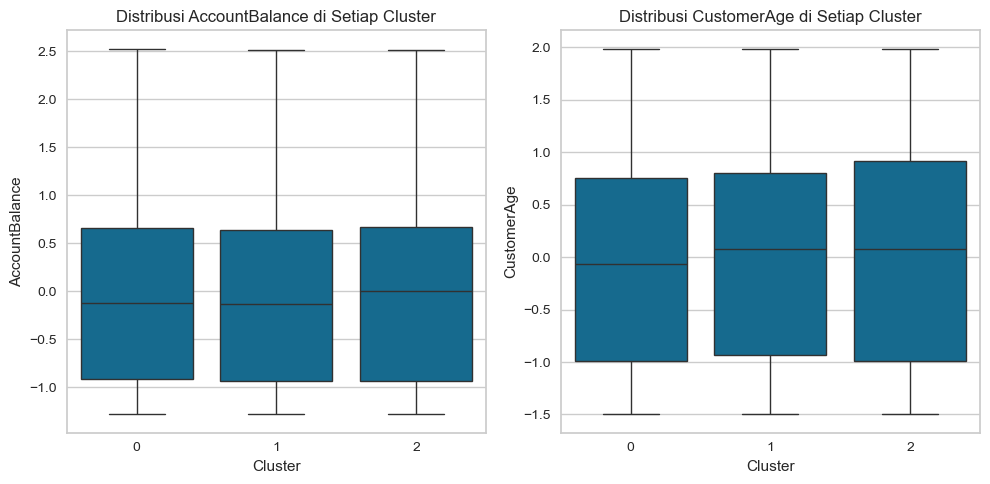

In [58]:
# Visualisasi fitur numerik dengan korelasi tinggi di setiap cluster
# Fitur yang dipilih untuk divisualisasikan
fitur_numerik_terpilih = ['AccountBalance', 'CustomerAge']

# Membuat figure dengan ukuran 15x5
plt.figure(figsize=(15, 5)) 

# Melakukan iterasi untuk setiap fitur numerik yang dipilih
for i, fitur in enumerate(fitur_numerik_terpilih):
    plt.subplot(1, 3, i+1)  # Membuat subplot untuk setiap fitur
    sns.boxplot(x=df_normalized["Cluster"], y=df_normalized[fitur])  # Membuat boxplot untuk fitur berdasarkan cluster
    plt.title(f'Distribusi {fitur} di Setiap Cluster')  # Menambahkan judul pada plot

# Mengatur tata letak agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

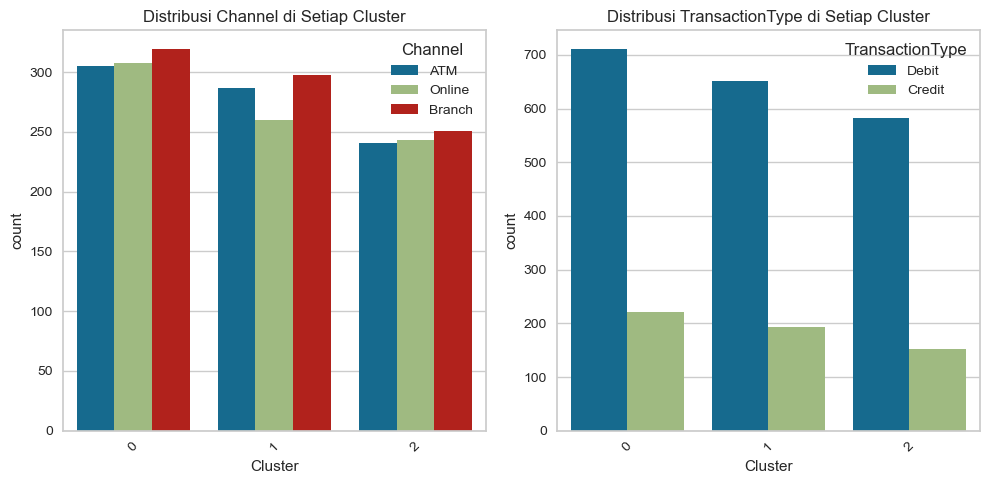

In [59]:
# Visualisasi fitur kategorikal di setiap cluster
# Fitur kategorikal yang dipilih untuk divisualisasikan
fitur_kategorikal_terpilih = ['Channel', 'TransactionType']

# Membuat figure dengan ukuran 15x5
plt.figure(figsize=(15, 5))

# Melakukan iterasi untuk setiap fitur kategorikal yang dipilih
for i, fitur in enumerate(fitur_kategorikal_terpilih):
    plt.subplot(1, 3, i+1)  # Membuat subplot untuk setiap fitur
    sns.countplot(x=df_normalized["Cluster"], hue=df_normalized[fitur])  # Membuat countplot untuk fitur berdasarkan cluster
    plt.title(f'Distribusi {fitur} di Setiap Cluster')  # Menambahkan judul pada plot
    plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca

# Mengatur tata letak agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [60]:
# Export data to CSV
df_normalized.to_csv('bank_transactions_data_clustered.csv', index=False)